In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (14.0, 14.0)
matplotlib.rcParams['axes.titlesize'] = 16

Before reading on, you may want to look at the pyspark script used to create this data.

Let's import the data and get an get an idea of what it looks like.

In [85]:
change1415 = pd.read_csv('change1415.csv')
change1516 = pd.read_csv('change1516.csv')
change1617 = pd.read_csv('change1617.csv')
change1415.head()

,StateCode,Age,avg(IndividualRate)_2014,avg(IndividualTobaccoRate)_2014,avg(Couple)_2014,avg(PrimarySubscriberAndOneDependent)_2014,avg(PrimarySubscriberAndTwoDependents)_2014,avg(PrimarySubscriberAndThreeOrMoreDependents)_2014,avg(CoupleAndOneDependent)_2014,avg(CoupleAndTwoDependents)_2014,...,avg(CoupleAndThreeOrMoreDependents)_2015,change_avg(IndividualRate),change_avg(IndividualTobaccoRate),change_avg(Couple),change_avg(PrimarySubscriberAndOneDependent),change_avg(PrimarySubscriberAndTwoDependents),change_avg(PrimarySubscriberAndThreeOrMoreDependents),change_avg(CoupleAndOneDependent),change_avg(CoupleAndTwoDependents),change_avg(CoupleAndThreeOrMoreDependents)
0,SC,Family Option,26.568579,NaN,45.970598,45.162818,63.757422,87.464759,64.564371,83.159076,...,112.351739,23.154725,NaN,14.603655,15.627532,23.381819,9.671423,22.557723,14.351529,5.133149
1,TX,29,188.201377,314.890420,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,7.735783,-6.384138,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,WI,42,388.225208,478.267213,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-3.484193,-3.680138,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IN,62,799.026427,1332.284679,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-55.742872,-25.436129,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,PA,26,229.106052,280.519724,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-9.239450,-0.988973,NaN,NaN,NaN,NaN,NaN,NaN,NaN


It'll be difficult to work with some of the column names, so let's get rid of the parentheses and 'avg' in the change columns.

In [86]:
import re
toMatch = re.compile('\(\w+\)')
renameCols = {col:  col.replace('(', "").replace(')', "").replace('avg', "") for col in change1415.columns  if 'change' in col}
change1415 = change1415.rename(columns=renameCols)
change1516 = change1516.rename(columns=renameCols)
change1617 = change1617.rename(columns=renameCols)

We're only looking at family rates, so we'll only keep rows that pertain to family rates.

In [87]:
change1415 = change1415[change1415.Age == 'Family Option']
change1516 = change1516[change1516.Age == 'Family Option']
change1617 = change1617[change1617.Age == 'Family Option']

Let's start by getting an overall sense of how the rates have changed from year to year. We'll plot the average change of the family rate categories.

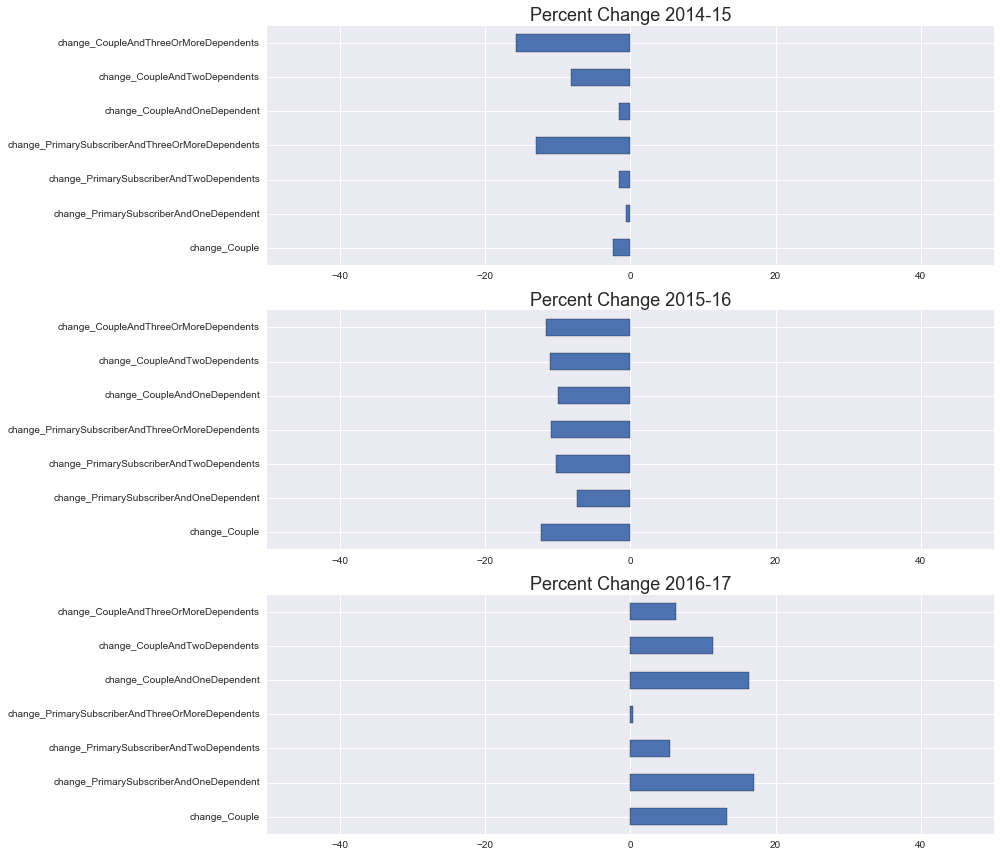

In [9]:
familyCols = ['change_Couple',
       'change_PrimarySubscriberAndOneDependent',
       'change_PrimarySubscriberAndTwoDependents',
       'change_PrimarySubscriberAndThreeOrMoreDependents',
       'change_CoupleAndOneDependent', 'change_CoupleAndTwoDependents',
       'change_CoupleAndThreeOrMoreDependents']

fig, axes = plt.subplots(3,1, figsize=(14,12))
for ax, years, df in zip(axes.ravel(), ['2014-15', '2015-16', '2016-17'], [change1415, change1516, change1617]):
    df[familyCols].mean().plot.barh(ax=ax)
    ax.set_title('Percent Change ' + years)
    ax.set_xlim(-50,50)

fig.tight_layout()

We can see that the rates decreased from 2014-2016, but increased from 2016-2017.

Let's take a look at the distributions of each rate for each year.

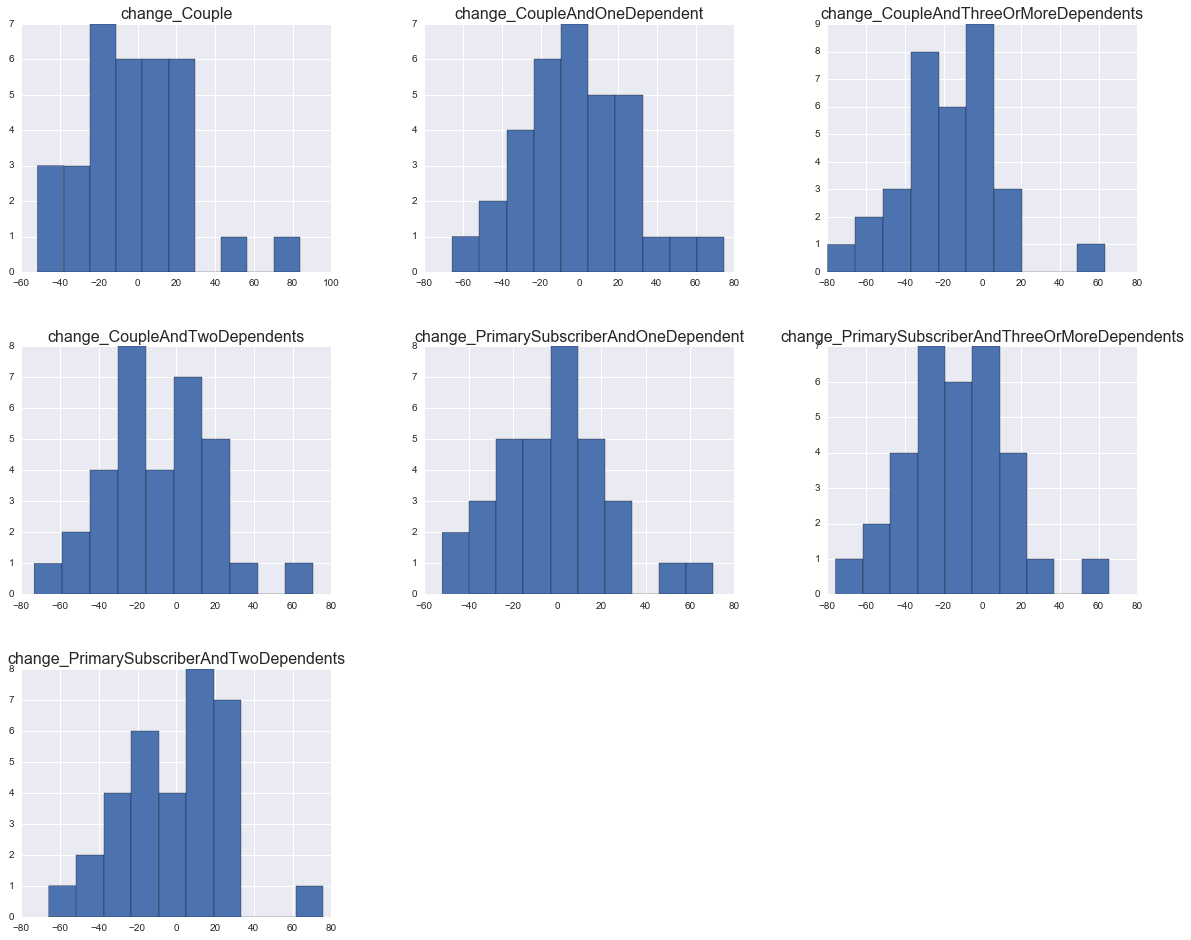

In [46]:
_ = change1415.hist(column=familyCols, figsize=(20, 16))

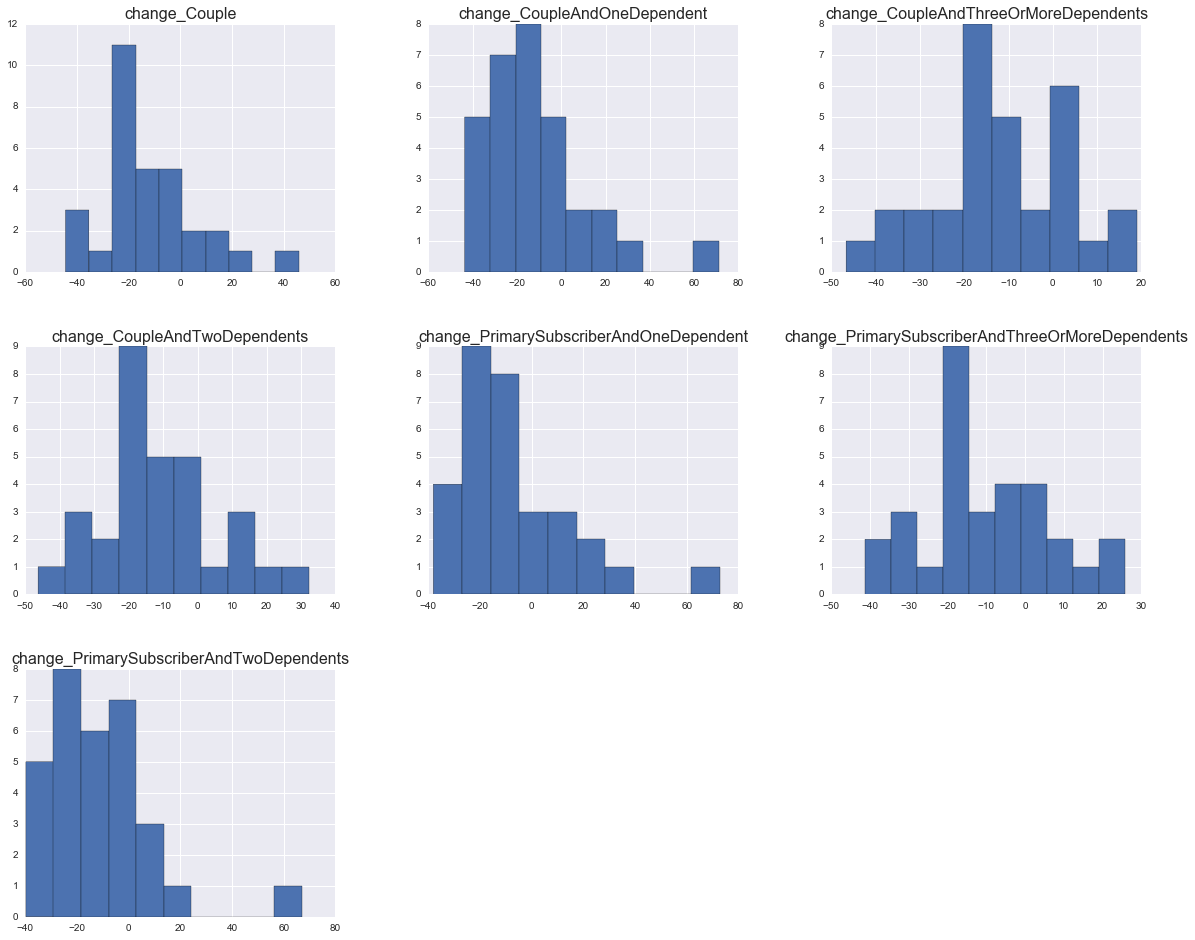

In [42]:
_ = change1516.hist(column=familyCols, figsize=(20, 16))

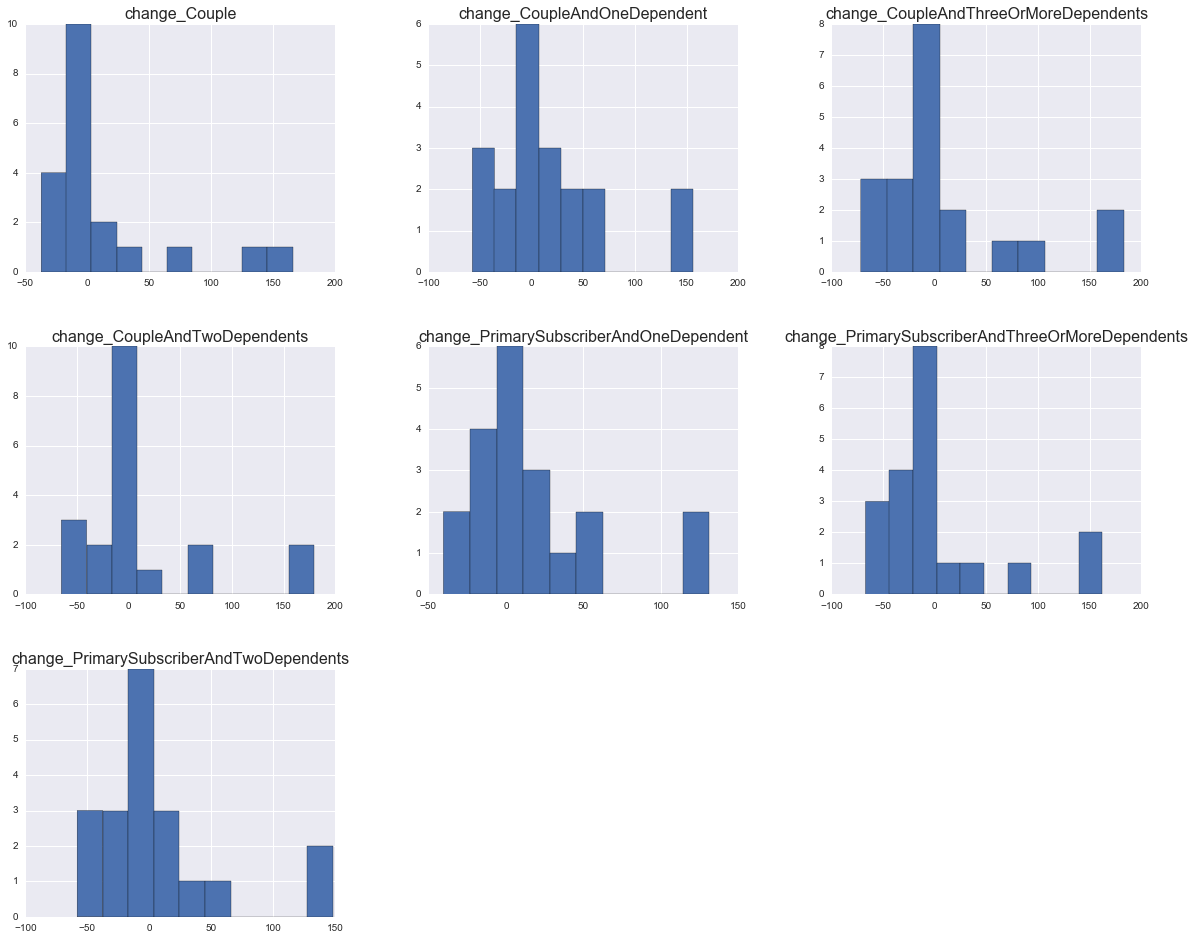

In [70]:
_ = change1617.hist(column=familyCols, figsize=(20, 16))

Those graphs contain lot of information, but the most interesting observation comes from the 2016-2017 graphs. When we plotted just the average rate changes, we saw that rates increased from 2016 to 2017. However, the histograms show that many of the states had changes near or below zero. It may have been just a few states with huge increases that pulled the averages up.

Let's plot the changes in rates for a couple with two dependents to get a better idea of how rate changes varied by state.

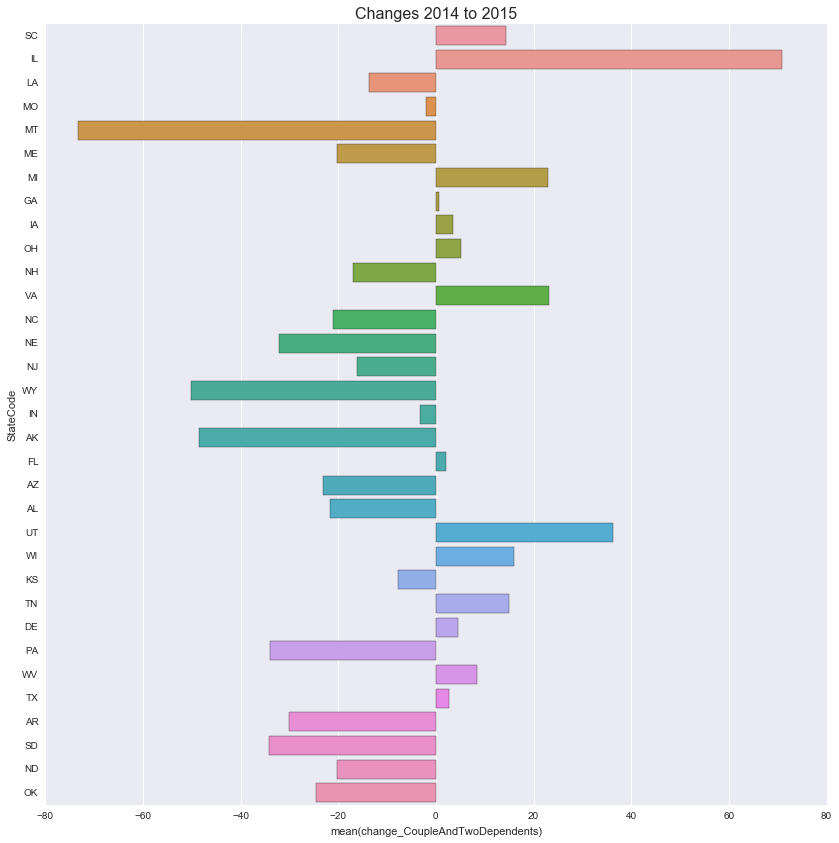

In [88]:
fig, ax= plt.subplots(1,1)
sns.barplot(y='StateCode', x='change_CoupleAndTwoDependents', data=change1415, ax=ax)
_ = ax.set_xlim((-80,80))
ax.set_title('Changes 2014 to 2015')

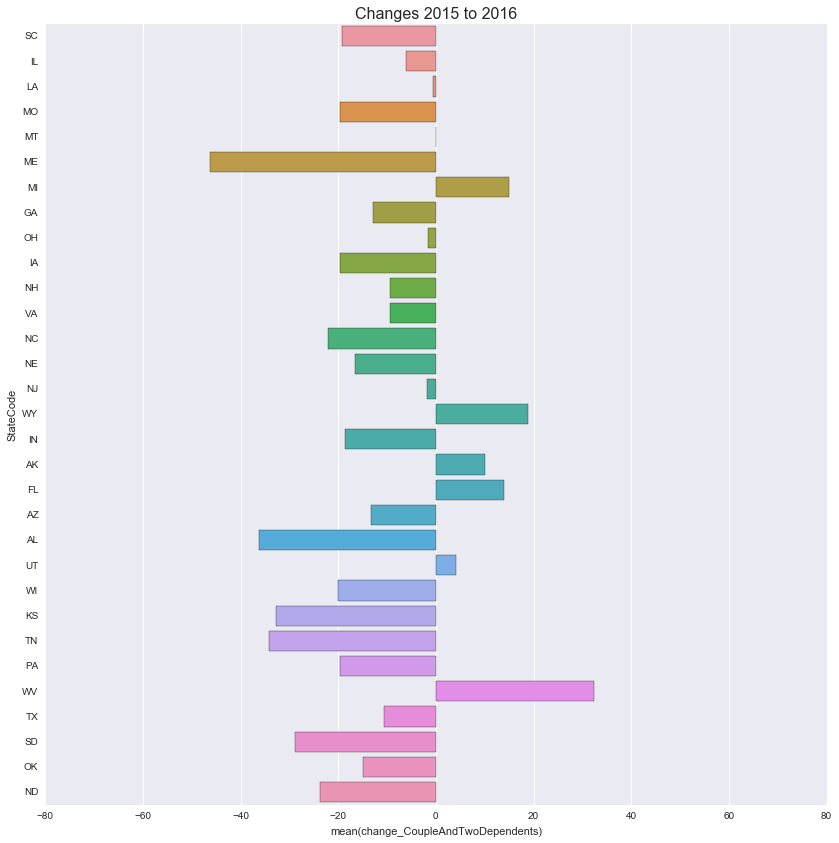

In [89]:
fig, ax= plt.subplots(1,1)
sns.barplot(y='StateCode', x='change_CoupleAndTwoDependents', data=change1516, ax=ax)
_ = ax.set_xlim((-80,80))
ax.set_title('Changes 2015 to 2016')

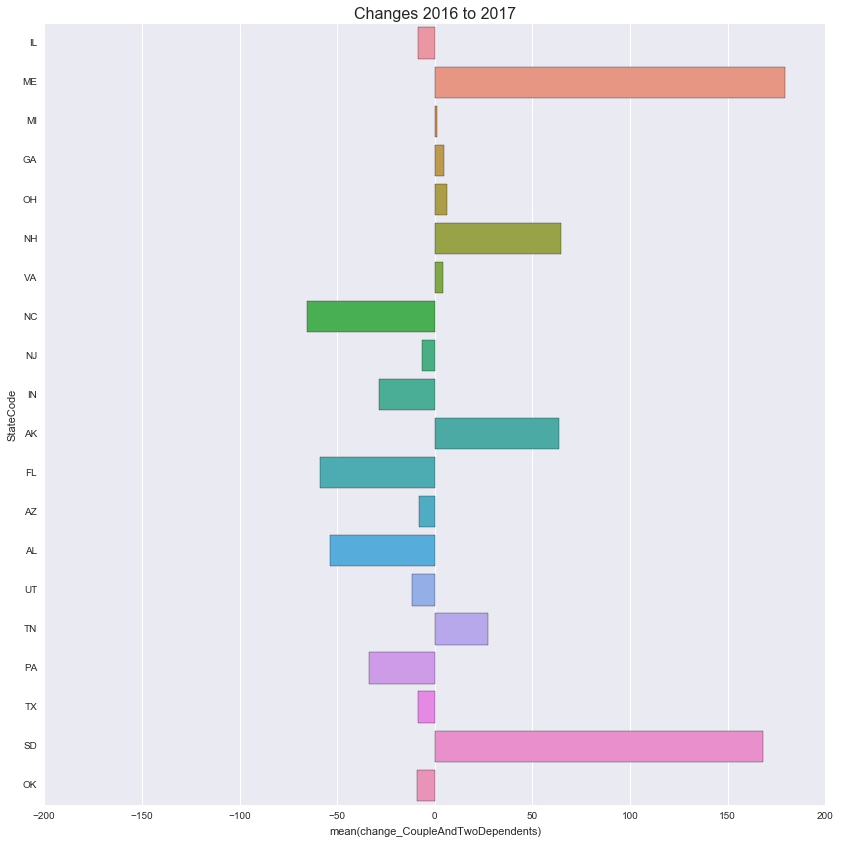

In [90]:
fig, ax= plt.subplots(1,1)
sns.barplot(y='StateCode', x='change_CoupleAndTwoDependents', data=change1617, ax=ax )
_ = ax.set_xlim((-200,200))
ax.set_title('Changes 2016 to 2017')

Clearly, the changes in rates vary a lot from state to state. For the last plot, notice the change of scale. South Dakota and Maine had increases of over 150% from 2016 to 2017!

Lastly, let's look at some maps. Below is a function that will help us do it.

In [74]:
import json
import folium
from folium.colormap import linear

us_states =  r'us-states.json'

geo_json_data = json.load(open(us_states))

fips = pd.read_csv('fips-codes.csv', header=None)
states = pd.DataFrame({'StateCode':pd.Series(fips[0].rename(columns={0:'StateCode'}).unique())})

def makeStateMap(df, dataCol):
    m = folium.Map(location=[43, -100], zoom_start=4)
    
    dataDict = df[df[dataCol].notnull()].set_index('StateCode')[dataCol]
    
    colormap = linear.RdBu.scale(
        -25,
        25)
    
    #we need to all the states in our dataset, or folium will throw an error. So we add the states that are missing
    statesToAppend =  pd.Series(index=[state for state in states.StateCode if state not in dataDict.index.values])
    
    #determine the colors for each state -- note we use black for 
    #states that were originally missing from our dataset 
    dataDict = dataDict.append(statesToAppend).fillna(-9999)
    color_dict = {key: colormap(dataDict[key]) if dataDict[key] != -9999 else '#000' for key in dataDict.keys()}
    
    folium.GeoJson(
    geo_json_data,
    style_function=lambda feature: {
        'fillColor': color_dict[feature['id']],
        'color': 'black',
        'weight': 1,
        'fillOpacity': 0.9,
    }
).add_to(m)
    
    colormap.caption = 'Percentage Change'
    colormap.add_to(m)
    return m

For simplicity, let's just visualize the rate changes for a couple and one dependent for each year. Note we've limited the color scale from -25 to 25, to make it easier to distinguish which states had increases from those that had decreases. Additionally, the states in black are states we don't have data for.

In [75]:
m = makeStateMap(change1415, 'change_CoupleAndOneDependent')
m

In [76]:
m = makeStateMap(change1516, 'change_CoupleAndOneDependent')
m

In [77]:
m = makeStateMap(change1617, 'change_CoupleAndOneDependent')
m

I hadn't realized how many states were missing data for 2016-2017. I wonder why it wasn't included in the PUF datasets. 

With a subject as complex as health insurance, it's hard to come to any definitive conclusions. That much missing data only makes it harder.